# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

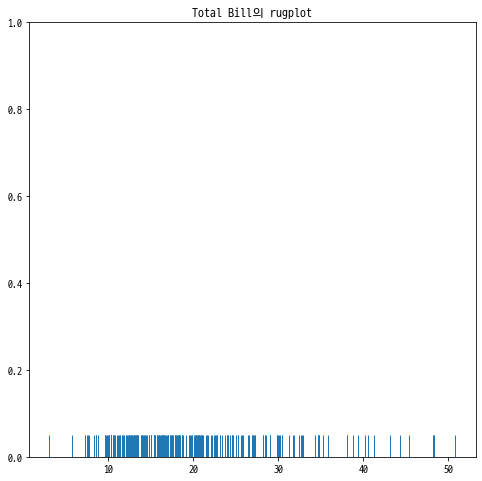

In [5]:
plt.figure(figsize=(8,8))

sns.rugplot(tips['total_bill'])
# alpha 써도 크게 느낌이 없다.

plt.title('Total Bill의 rugplot')

plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

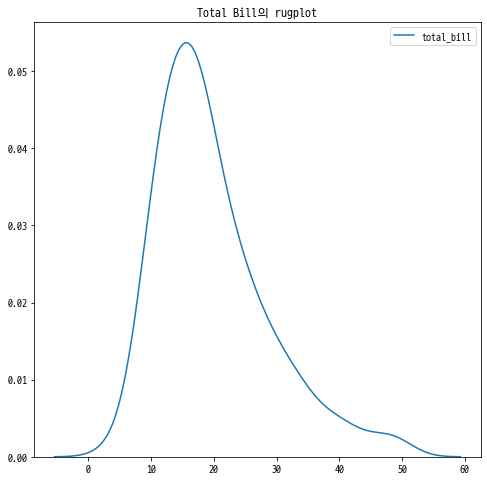

In [6]:
plt.figure(figsize=(8,8))

sns.kdeplot(tips['total_bill'])

plt.title('Total Bill의 rugplot')

plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.
    - kdeplot은 default로 나오고 rugplot은 default로 안나온다.

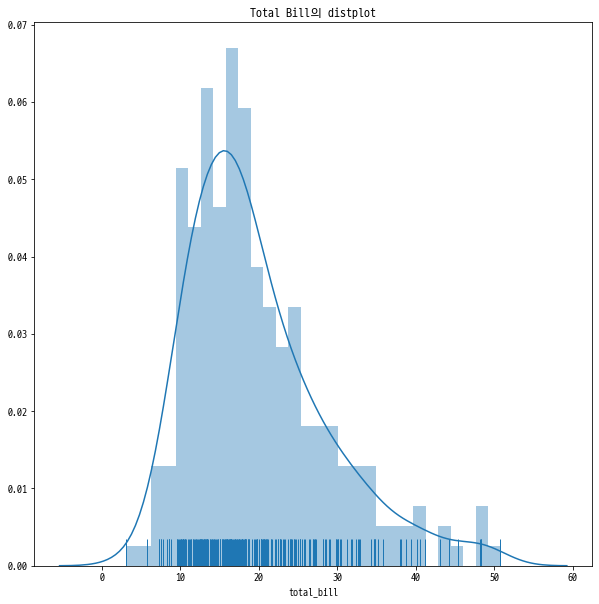

In [11]:
plt.figure(figsize=(10,10))

sns.distplot(tips['total_bill'], bins=30, rug=True)
# kde=False,
# hist=False
# 위에 두개는 True가 기본값. False로 넣으면 지워진다.

# rug는 False가 기본값. True를 넣으면 나온다.

plt.title('Total Bill의 distplot')

plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

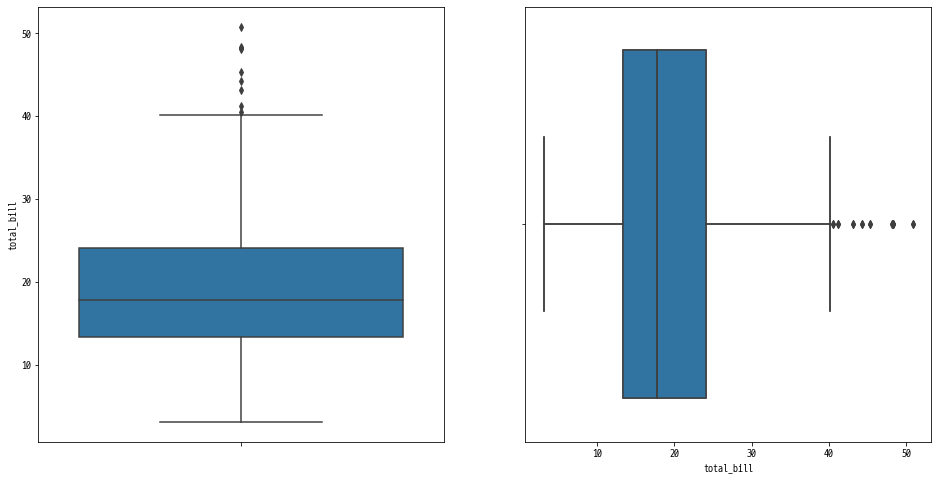

In [13]:
plt.figure(figsize=(16,8))

plt.subplot(121)

sns.boxplot(y=tips['total_bill'])

plt.subplot(122)

sns.boxplot(x=tips['total_bill'])

sns.boxplot(x='total_bill', data=tips)
# data=데이터프레임, 
# x/y='컬럼명'

plt.show()

# 애초에 박스플롯은 1차원 시리즈만 있으면 된다.
# x로 지정하냐 y로 지정하냐에 따라서 방향이 달라진다.

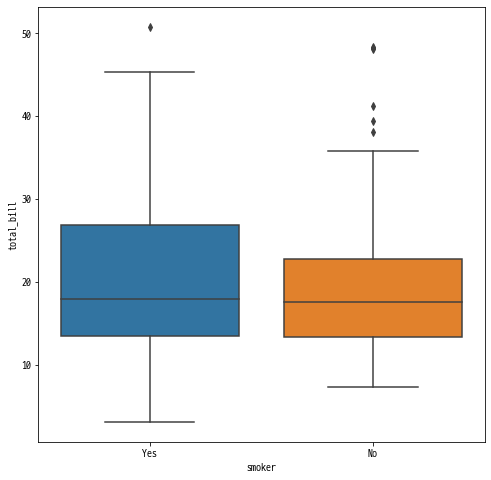

In [14]:
plt.figure(figsize=(8,8))

# 범주별로 분류해서 그릴 때, 
# 한 축(X 또는 Y)에는 값의 변수(컬럼)를
# 다른 축에는 범주형 변수(컬럼)를 지정한다.

sns.boxplot(x='smoker', y='total_bill', data=tips)

plt.show()

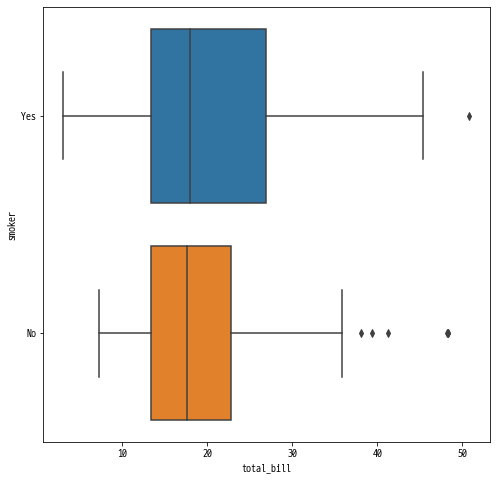

In [15]:
# 옆으로 눕혀보자
plt.figure(figsize=(8,8))



sns.boxplot(x='total_bill', y='smoker', data=tips)

plt.show()

In [18]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


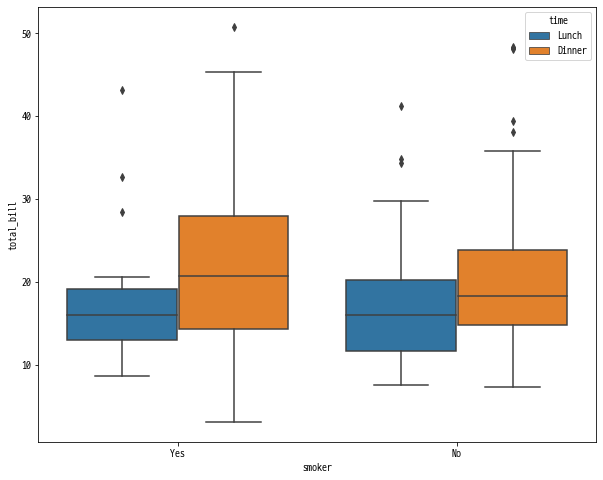

In [22]:
# 범주형 값을 두 개 이상 사용해 보자.

plt.figure(figsize=(10,8))

# 분류 : smoker, sex
# 값 : total_bill

sns.boxplot(x='smoker', y='total_bill', hue='time', data=tips)

# hue : 범주형 컬럼 => 고유값 별로 다른 색으로 그려라.
# palette : 컬러맵을 지정. matplotlib에 정의된 컬러맵 이름을 지정해준다.

plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

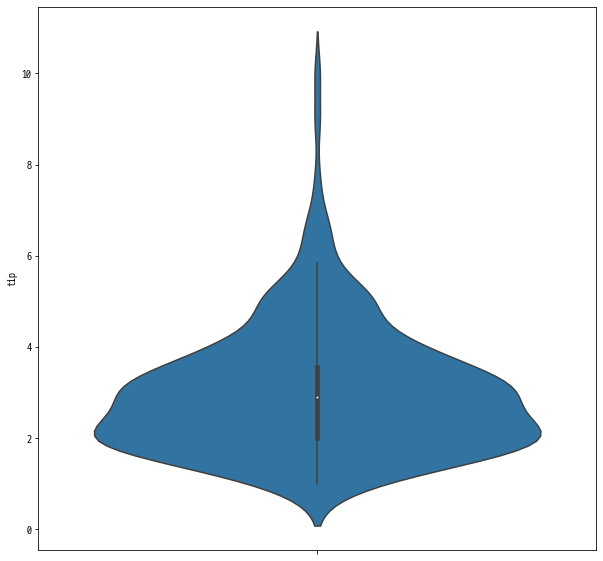

In [24]:
plt.figure(figsize=(10,10))

sns.violinplot(y='tip', data=tips)

plt.show()

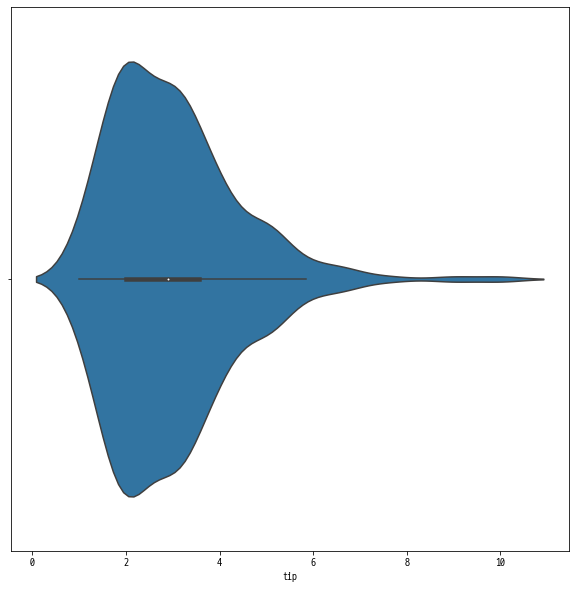

In [25]:
plt.figure(figsize=(10,10))

sns.violinplot(x='tip', data=tips)

plt.show()

# y로 하는게 더 낫다.

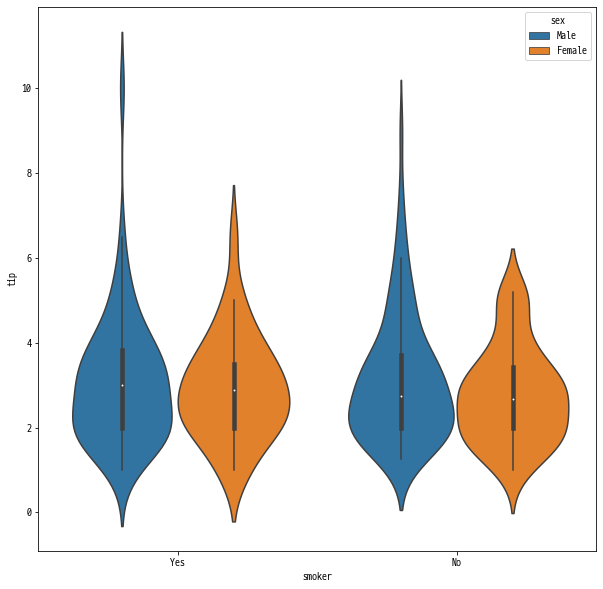

In [27]:
# 여러 개 사용해보자.
plt.figure(figsize=(10,10))
# sns.violinplot(x='smoker', y='tip', data=tips)
sns.violinplot(x='smoker', y='tip', hue='sex', data=tips)
plt.show()

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

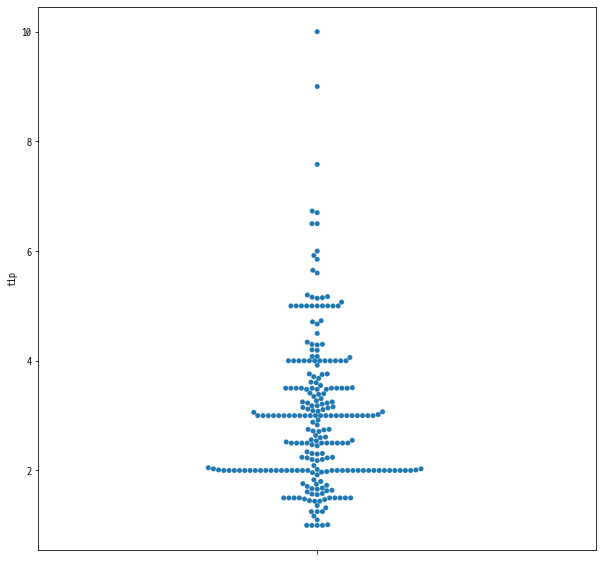

In [31]:
plt.figure(figsize=(10,10))

sns.swarmplot(y='tip', data=tips)
# 너도 마찬가지로 x축에 값을 줄 수 있겠지
# sns.swarmplot(x='tip', data=tips)

plt.show()

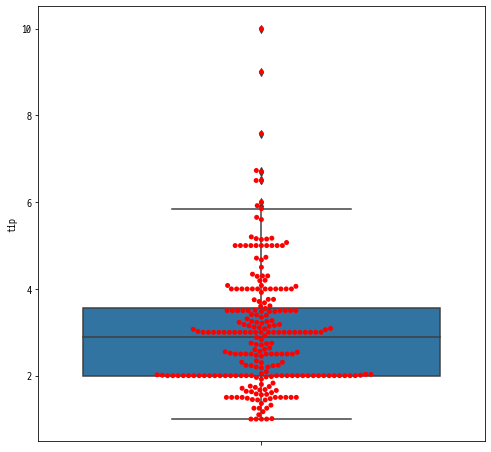

In [33]:
# 박스플롯과 동시에 써보기

plt.figure(figsize=(8,8))

sns.boxplot(y='tip', data=tips)
sns.swarmplot(y='tip', data=tips, color='r')
# 색을 다르게 주자

plt.show()

# 이렇게 동시에 쓰면 어디에 얼마나 분포되고 있는지 더 보기 좋다.

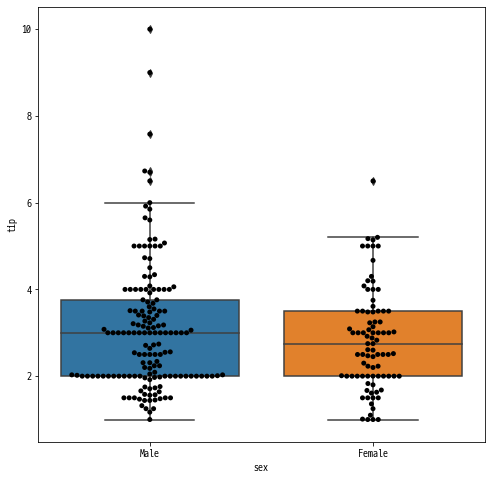

In [39]:
# 두 개의 컬럼 이용해 보기

plt.figure(figsize=(8,8))

sns.boxplot(x='sex', y='tip', data=tips)
sns.swarmplot(x='sex', y='tip', data=tips, color='k')

plt.show()

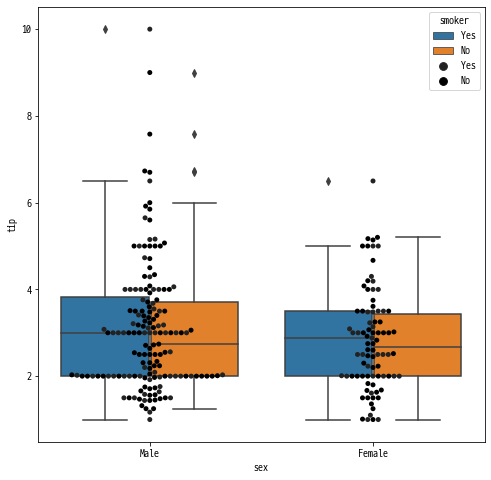

In [40]:
plt.figure(figsize=(8,8))

sns.boxplot(x='sex', y='tip', hue='smoker', data=tips)
sns.swarmplot(x='sex', y='tip', hue='smoker',data=tips, color='k')

plt.show()

# hue는 안되나?

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

In [43]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


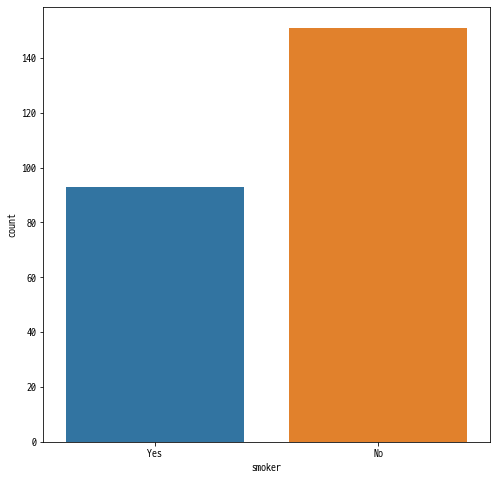

In [41]:
# 범주형 값들의 개수 표시

plt.figure(figsize=(8,8))

sns.countplot(x='smoker', data=tips)

plt.show()

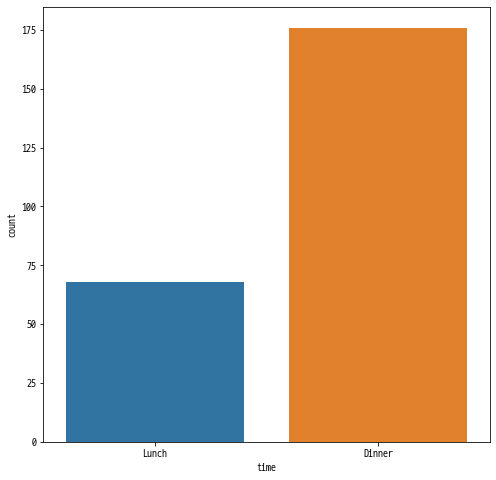

In [42]:
plt.figure(figsize=(8,8))

sns.countplot(x='time', data=tips)

plt.show()

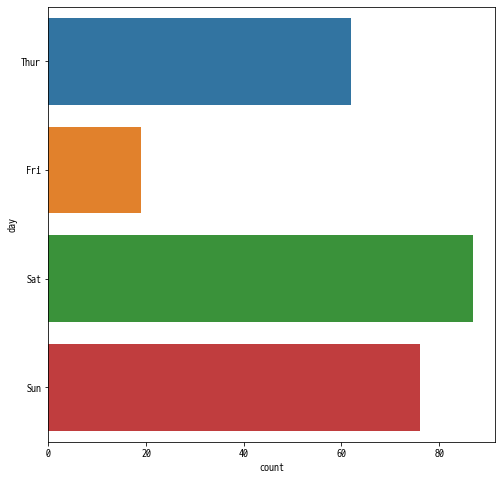

In [45]:
plt.figure(figsize=(8,8))

sns.countplot(y='day', data=tips)

plt.show()

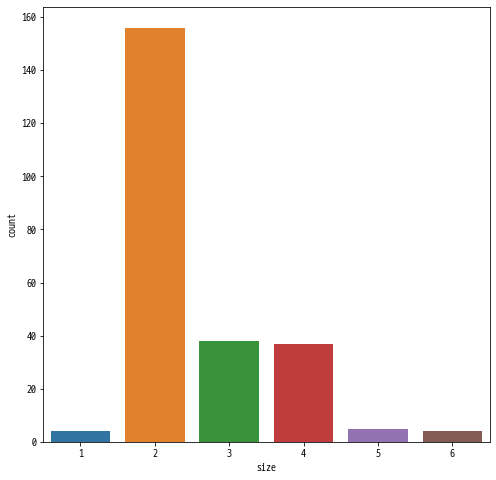

In [46]:
plt.figure(figsize=(8,8))

sns.countplot(x='size', data=tips)

plt.show()

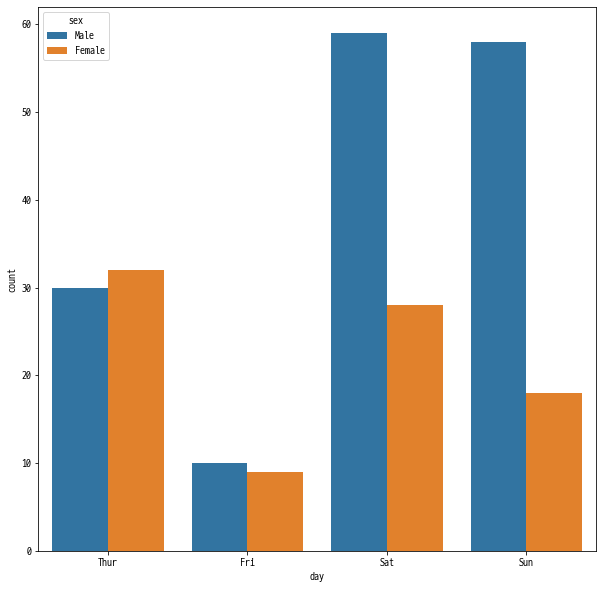

In [48]:
# hue 사용하기

plt.figure(figsize=(10,10))

sns.countplot(x='day', hue='sex', data=tips)

plt.show()

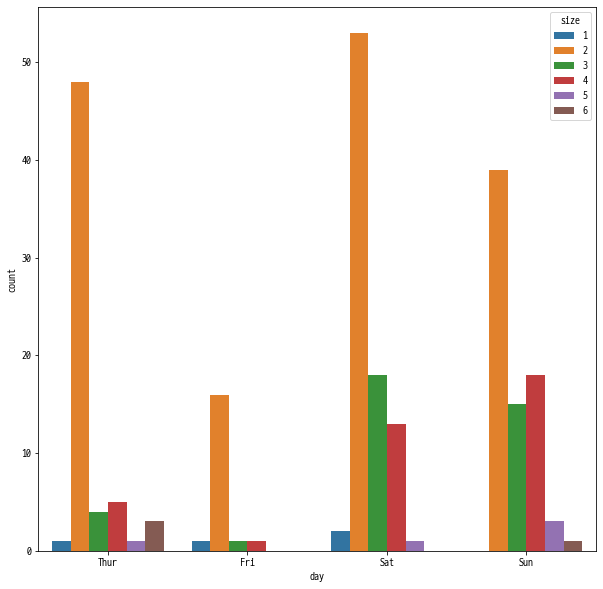

In [49]:
plt.figure(figsize=(10,10))

sns.countplot(x='day', hue='size', data=tips)

plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

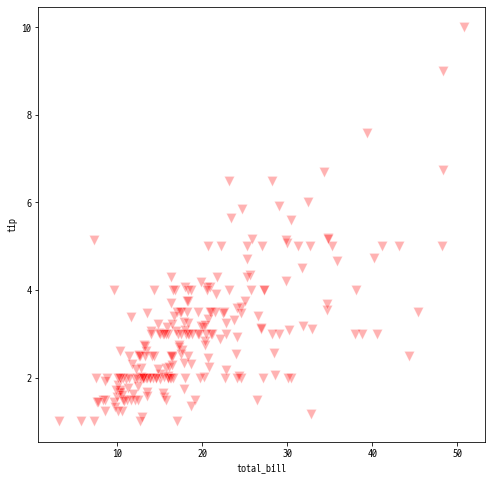

In [51]:
plt.figure(figsize=(8,8))

sns.scatterplot(x='total_bill', y='tip', data=tips,
               marker='v', # 마커 모양
               s=100, # 마커 사이즈
               color='red', # 마커 색상
               alpha=0.3) # 투명도

plt.show()

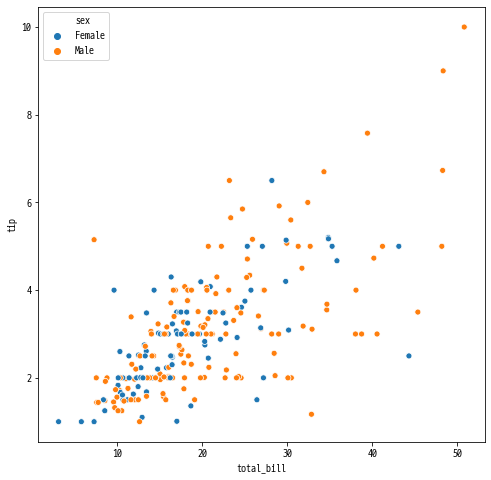

In [52]:
# hue 사용해 보기
plt.figure(figsize=(8,8))

sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)

plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.

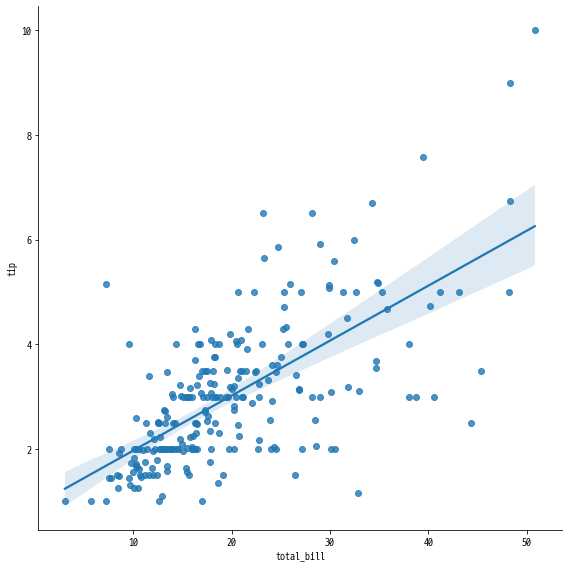

In [53]:
# lm : linear model의 약자. 선형모델 플롯
sns.lmplot(x='total_bill', y='tip', data=tips, height=8)
plt.show()

# 평균오차의 제곱, 오차 계산.
# 여러가지 방법이 있다. 경사하강법, 등등
# 이것이 회귀분석. 연속형 값을 예측.

# 이 관계를 가장 잘 표현하는 선을 그려준다.

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

<Figure size 576x576 with 0 Axes>

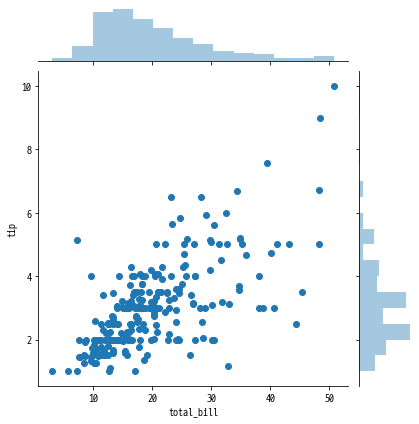

In [54]:
plt.figure(figsize=(8,8))

sns.jointplot(x='total_bill', y='tip', data=tips)

plt.show()

# 스캐터를 기본으로 그려주고 히스토그램도 그려준다.
# 히스토그램 + 스캐터

### paireplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

In [55]:
# 숫자 타입인 데이터만 고르기
tips.select_dtypes(include=[np.number])

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


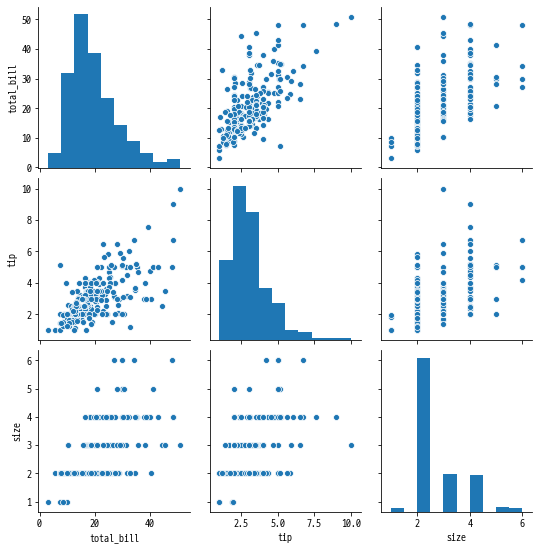

In [56]:
sns.pairplot(tips)

plt.show()

# 굳이 타입 지정해줄 필요없다.
# 알아서 숫자만 가지고 해준다.
# 여러 개 산점도를 같이 볼 수 있다.

### heatmap()
- 값들에 비레해서 색갈을 다르게 해 2차원 자료로 시각화

In [57]:
# 컬럼이 많으면 숫자로 보기 힘들다.
tips.corr()
# 그래서 히트맵을 사용한다.

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


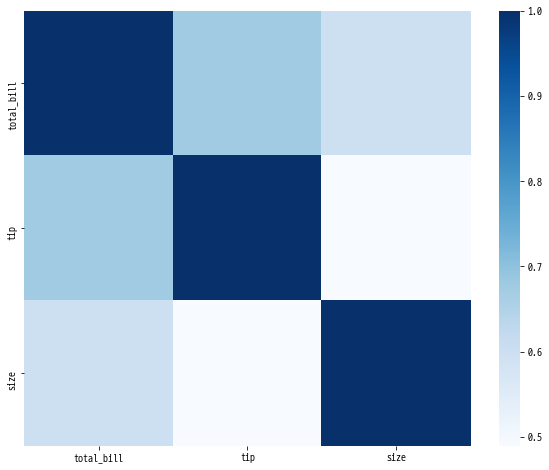

In [61]:
plt.figure(figsize=(10,8))

sns.heatmap(tips.corr(), cmap='Blues')
# cmap 사용
plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [62]:
# 데이터프레임 만들기
index = pd.date_range('20200101', periods=10, freq='MS')
value = np.random.randint(1,100,size=(10,3))

df = pd.DataFrame(value, index=index, columns=['A', 'B', 'C'])
df.head()

,A,B,C
2020-01-01,95,15,68
2020-02-01,56,56,44
2020-03-01,28,44,42
2020-04-01,63,59,39
2020-05-01,25,87,71


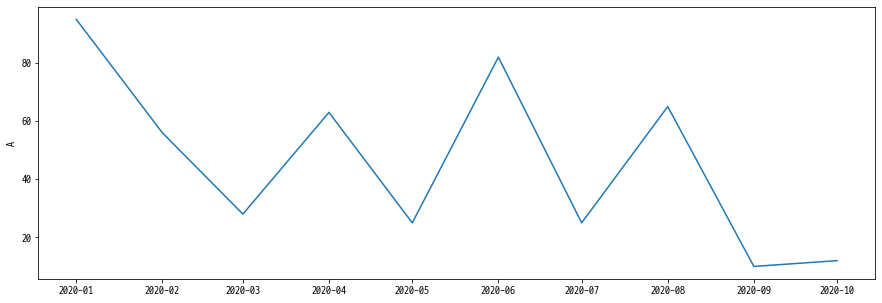

In [63]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index, y='A', data=df)
plt.show()

In [67]:
df.sum(axis=1)

2020-01-01    178
2020-02-01    156
2020-03-01    114
2020-04-01    161
2020-05-01    183
2020-06-01    182
2020-07-01    153
2020-08-01    188
2020-09-01    140
2020-10-01    102
Freq: MS, dtype: int64

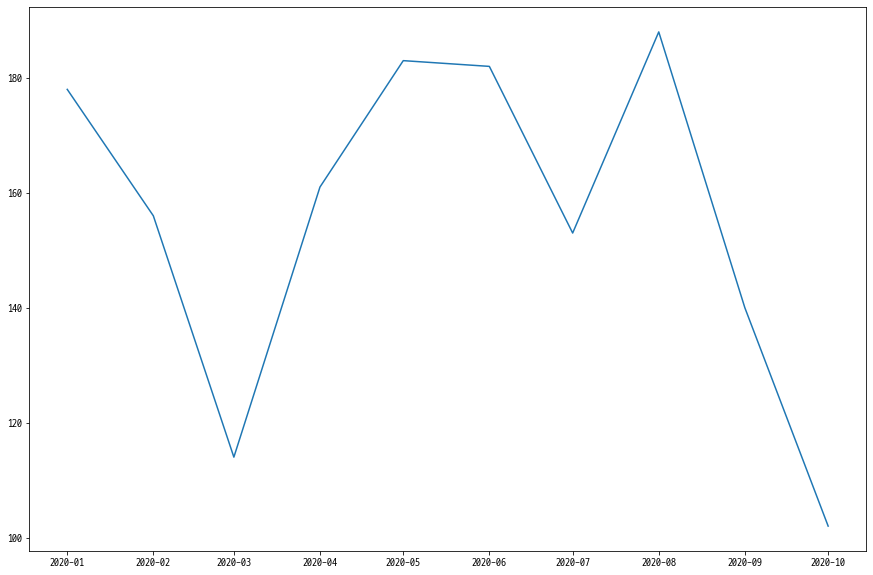

In [68]:
df.sum(axis=1)

plt.figure(figsize=(15,10))
sns.lineplot(x=df.index, y=df.sum(axis=1))
plt.show()